# Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data/AirPassengers.csv')
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


<AxesSubplot:>

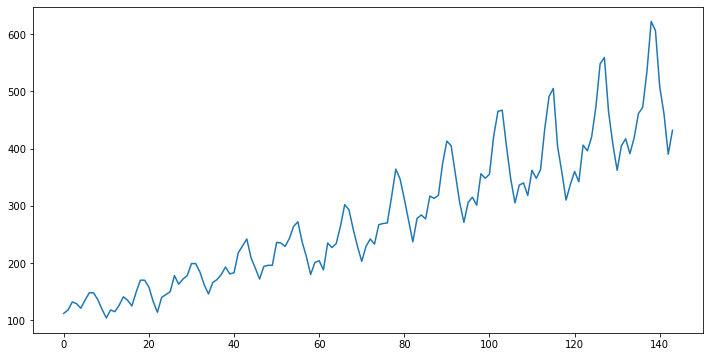

In [3]:
plt.rcParams.update({'figure.figsize': (12,6)})
df['#Passengers'].plot()

In [4]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# Moving Averages
- Simple Moving Averages (SMA)
- Cumulative Moving Averages (CMA)
- Exponential Moving Averages (EMA/EWMA)

# SMA/ Rolling Mean
$$ SMA_t = \frac{ x_t + x_{t-1} + x_{t-2} + .... + x_{t-n}}{n}$$

In [5]:
df['SMA_30'] = df['#Passengers'].rolling(window=30).mean() # k=30

<AxesSubplot:>

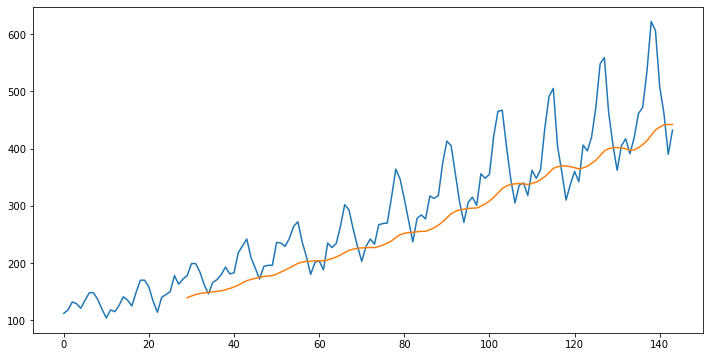

In [6]:
df['#Passengers'].plot()
df['SMA_30'].dropna().plot()

#### Conclusion : - #Passengers Column has Uptrend / Incrasing Trend(Pattern)

# CMA
$$ CMA_t = \frac { x_1 + x_2 + x_3 + .... + x_n} {n} $$

In [7]:
df['CMA']=df['#Passengers'].expanding().mean()

In [8]:
df

,Month,#Passengers,SMA_30,CMA
0,1949-01,112,NaN,112.000000
1,1949-02,118,NaN,115.000000
2,1949-03,132,NaN,120.666667
3,1949-04,129,NaN,122.750000
4,1949-05,121,NaN,122.400000
...,...,...,...,...
139,1960-08,606,432.566667,275.514286
140,1960-09,508,437.433333,277.163121
141,1960-10,461,441.200000,278.457746
142,1960-11,390,442.100000,279.237762


<AxesSubplot:>

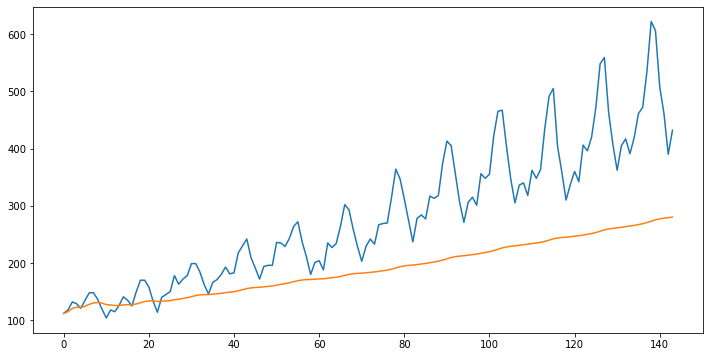

In [9]:
df['#Passengers'].plot()
df['CMA'].plot() # average stock

****Conclusion :- #Passengers Column has Uptrend / Incrasing Trend(Pattern). CMA will show the unweighted mean of the previous values up to the current time t, so it will give average increase in number of Passengers in #Passengers column  ****

# EMA / EWMA
$$ EMA_t = \alpha * x_t + (1- \alpha) * EMA_{t-1} $$

**** Alpha is Smoothing factor  
 Range of alpha between 0 to 1 ****

In [10]:
df['EMA_0.1'] = df['#Passengers'].ewm(alpha = 0.1).mean()
df['EMA_0.3'] = df['#Passengers'].ewm(alpha = 0.3).mean()

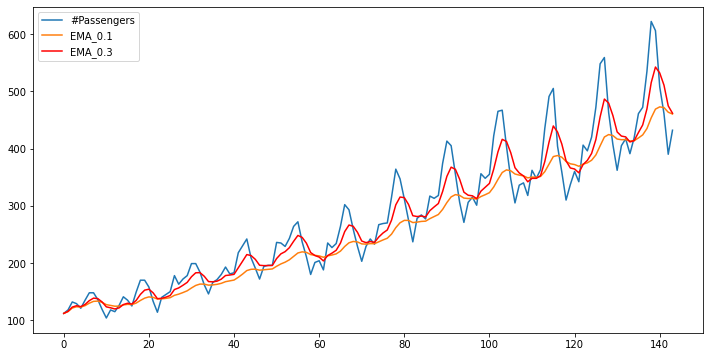

In [11]:
df['#Passengers'].plot()
df['EMA_0.1'].plot()
df['EMA_0.3'].plot(color='r')
plt.legend()

****Conclusion****:

**#Passengers Column has Uptrend / Incrasing Trend(Pattern). As value of alpha increases noise increases**